In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

# Ablation - CoT

In [3]:
ablation_path = Path("ablation-cot.txt")

"""
Vanila
JsonStructureCorrectness: 1.00
ExactMatch: 0.82
F1: 0.97
Recall: 0.95

FI
JsonStructureCorrectness: 1.00
ExactMatch: 0.82
F1: 0.85
Recall: 0.95

FI+ISP
JsonStructureCorrectness: 1.00
ExactMatch: 0.82
F1: 0.94
Recall: 0.90

FI+ISP+ST
JsonStructureCorrectness: 1.00
ExactMatch: 0.82
F1: 0.99
Recall: 1.00
"""

'\nVanila\nJsonStructureCorrectness: 1.00\nExactMatch: 0.82\nF1: 0.97\nRecall: 0.95\n\nFI\nJsonStructureCorrectness: 1.00\nExactMatch: 0.82\nF1: 0.85\nRecall: 0.95\n\nFI+ISP\nJsonStructureCorrectness: 1.00\nExactMatch: 0.82\nF1: 0.94\nRecall: 0.90\n\nFI+ISP+ST\nJsonStructureCorrectness: 1.00\nExactMatch: 0.82\nF1: 0.99\nRecall: 1.00\n'

In [6]:
with ablation_path.open("r") as f:
    data = f.read()

# split in empty lines
exps = [exp for exp in data.split("\n\n") if exp]
data_ablation = {}
for exp in exps:
    lines = exp.split("\n")
    name = lines[0]
    data_ablation[name] = {}
    for line in lines[1:]:
        key, value = line.split(": ")
        data_ablation[name][key] = float(value)

data_ablation = pd.DataFrame(data_ablation).T

data_ablation

,JsonStructureCorrectness,ExactMatch,F1,Recall
Vanila,1.0,0.82,0.97,0.95
FI,1.0,0.82,0.85,0.95
FI+ISP,1.0,0.82,0.94,0.90
FI+ISP+ST,1.0,0.82,0.99,1.00


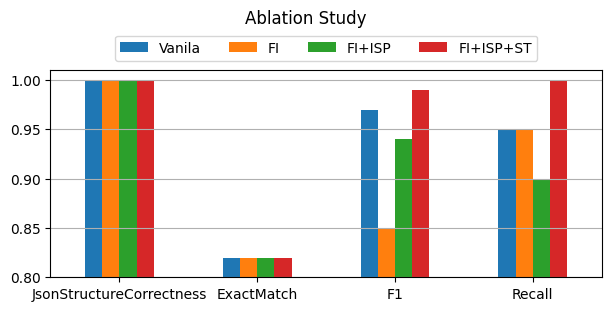

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3), layout="constrained")
data_ablation.T.plot(kind="bar", ax=ax)
fig.suptitle("Ablation Study - Chain of Thought")
ax.xaxis.set_tick_params(rotation=0)
ax.set_ylim(0.8, 1.01)
ax.grid(axis='y')
#legend to the top, under the title, upper figure
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=4)
fig.savefig("ablation.png", bbox_inches="tight")
plt.show()